In [5]:

#Clean tye data set, remove outliers in columns balance and amount
import pandas as pd

In [6]:
df = pd.read_csv(r'C:\Users\sures\Desktop\123.csv')
df.count()

Total_balance    100
Cus_id           100
Unnamed: 2         0
Annual_salary    100
Long_lat         100
Age              100
dtype: int64

In [7]:
#check null values for the given columns
df.isnull().sum()


Total_balance      0
Cus_id             0
Unnamed: 2       100
Annual_salary      0
Long_lat           0
Age                0
dtype: int64

In [ ]:
#use Age and total balance to predict the Annual salary

In [8]:
# Separate features and labels
X, y = df[['Total_balance','Age']].values,df['Annual_salary'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.75818658e+06 1.90000000e+01]
 [6.65248770e+05 2.60000000e+01]
 [8.06710310e+05 3.00000000e+01]
 [4.65855960e+05 2.10000000e+01]
 [2.60858310e+05 3.50000000e+01]
 [4.10738730e+05 1.80000000e+01]
 [4.00793800e+05 3.00000000e+01]
 [8.81717520e+05 2.10000000e+01]
 [2.99833367e+07 4.00000000e+01]
 [3.91621376e+06 2.40000000e+01]]

Labels:
[27842.22  8603.88 10851.72 13481.91  8703.84 11713.74 21277.36 18010.37
 29512.28 12048.98]


In [9]:
#train a regresssion model.
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 140, rows
Test Set: 60 rows


In [10]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [11]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [16299. 16423. 16258. 16927. 16270. 16358. 16562. 16950. 15804. 18599.]
Actual labels   :  [28925.61 27327.65 10851.72 25517.55 15929.29  7155.96 14952.56 21497.98
  9844.98 27326.11]


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 51185812.5426301
RMSE: 7154.4260805902595
R2: 0.1200514894721556


In [ ]:
# R squared value of 0.12 shows goodnesss of the model fit

In [ ]:
#The below plot shows that the model has resonably perfomed well in predicting .

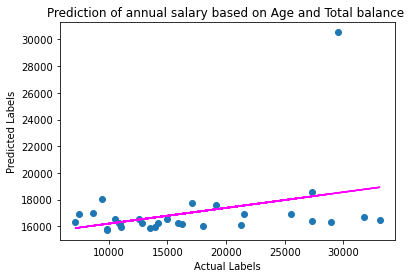

In [14]:

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediction of annual salary based on Age and Total balance ' )
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()